# Read Daily Incidence Cases and WW concentration For UTAH's wwtp
#Data from NWSS
#Author: Imelda Trejo
#Last update: Nov, 09, 2022
#Objective: extract and plot the raw data

In [2]:
# Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import datetime
from matplotlib import cm

In [4]:
plt.rcParams.update({'font.size':16})
colors = cm.plasma(np.linspace(0,1,12))

#----reports started at diferent days from 2021
baseURL="C:/Users/tui2/OneDrive - CDC/CDC_my_documments/Python_Codes_PLoS_One_revised_2021/data/utOrder.csv"



    
myData=pd.read_csv(baseURL,skipinitialspace=True)
#print(myData.head(10))

#Stratify the data by key_plot (smaller resolution than wwtp)
key_plot=np.array(myData.get(['key_plot'])).ravel()


In [5]:
#---------------------Define initial date for the analysis
#----date index: 1st case accrss all jurisdiction
#----From date index, we define the time series with index range(0,n)

dateIndex=np.unique(myData.get(['date']))  #ordered
allDates=len(dateIndex)
print('total observed days: n=', allDates)

#transaform the data into date type
newDateIndex=np.array(dateIndex).ravel()
for k in range(0,allDates):
    a= np.datetime64(dateIndex[k])
    a= a.astype(datetime.datetime)
    newDateIndex[k]=a.strftime('%b-%d-%y')

tend=np.where(newDateIndex=="Nov-04-22")[0][0] 

cleanDateIndex=newDateIndex[0:tend+1]
n=len(cleanDateIndex)
np.save("dateIndex.npy",cleanDateIndex)


print(cleanDateIndex[-10:])



total observed days: n= 687
['Oct-26-22' 'Oct-27-22' 'Oct-28-22' 'Oct-29-22' 'Oct-30-22' 'Oct-31-22'
 'Nov-01-22' 'Nov-02-22' 'Nov-03-22' 'Nov-04-22']


In [6]:
def ReadData(ToSelect,n):
    
    Y,W=np.zeros(n),np.zeros(n)

    myNewData=myData.loc[myData["key_plot"]==ToSelect] #select wwtp
    
    Tinit=np.array(myNewData.get(['date'])).ravel()[0]
    
    init=np.where(dateIndex==Tinit)[0][0] #1st report
    
    Yaux=np.array(myNewData.get(['cases_new_cens'])).ravel()
    
    Waux = np.array(myNewData.get(['pcr_target_avg_conc'])).ravel()
    
    # replace nan with zeros
    Yaux[np.isnan(Yaux)] = 0
    Waux[np.isnan(Waux)] = 0
    
    Y[init:]=Yaux[0:(n-init)]   #start from its 1st reported cases
    W[init:]=Waux[0:(n-init)]   #end in Nov-04-2022
    
    for k in range(0,n): #clean data
        if Y[k]<0:
            Y[k]=0       
        if W[k]<0:
            W[k]=0 
    return Y,W  

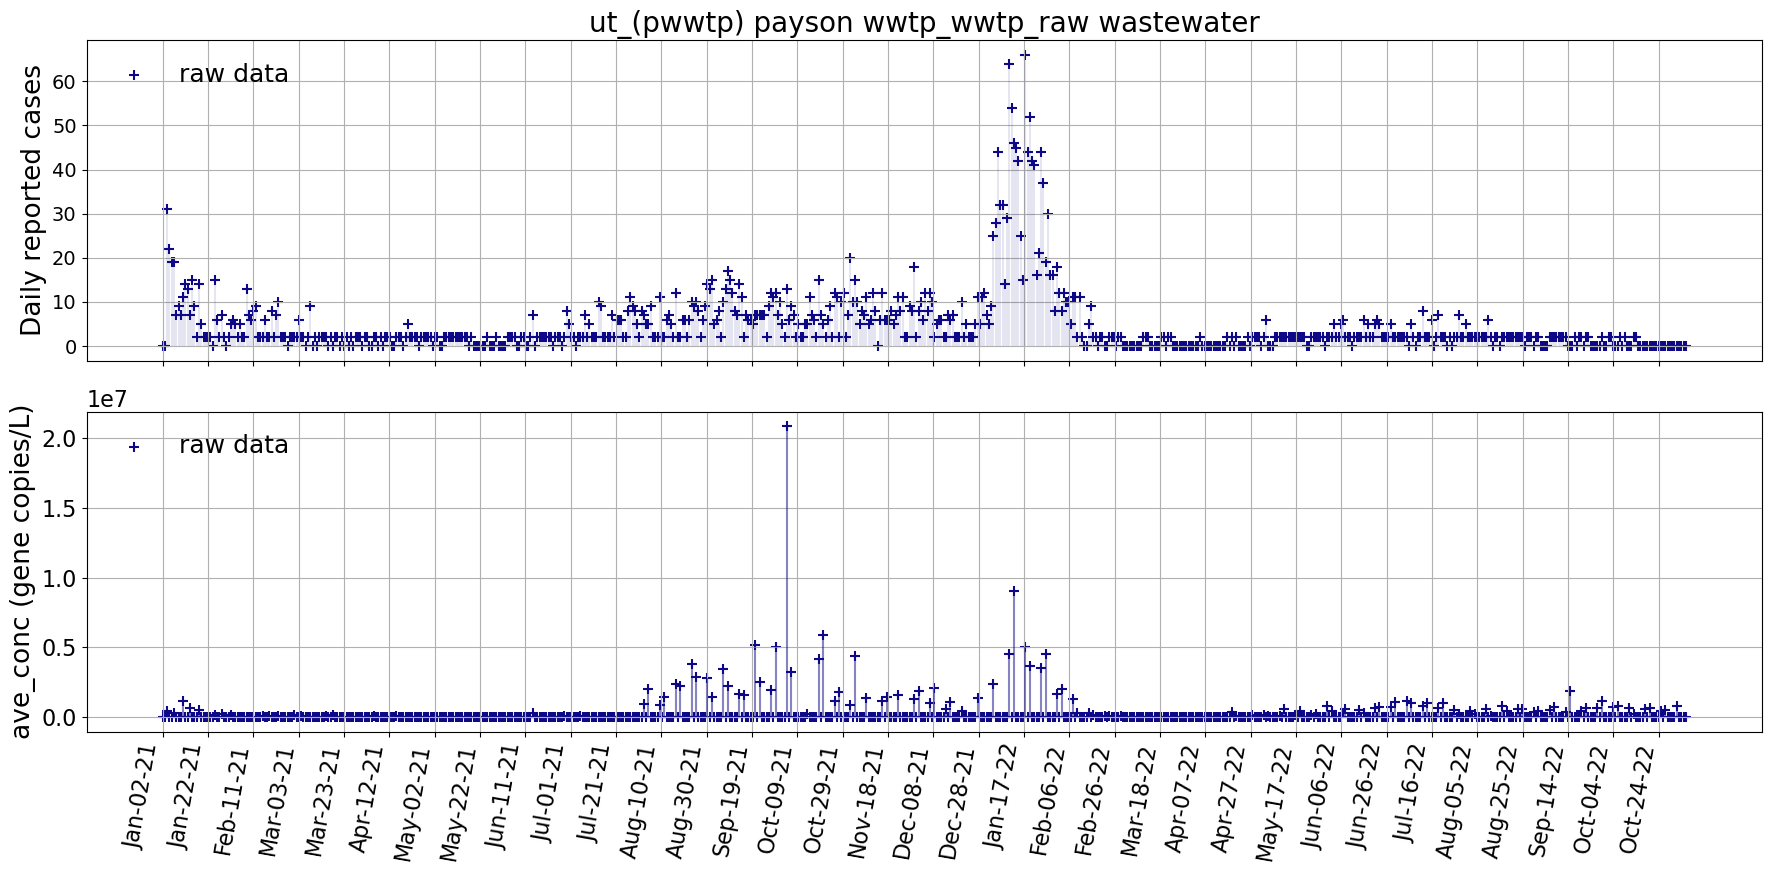

In [12]:
#plot the two time series
TT=np.linspace(0,n,n)
#print(len(TT),n)

for i in range(24,25):
    
    Yaux, Waux =ReadData(key_plot[i],n)
    
    #-------Save average data -----
    np.save("%sY.npy" %key_plot[i],Yaux)
    np.save("%sW.npy" %key_plot[i],Waux)
    
    #-------Plot raw data -----
    
    fig, ax = plt.subplots(2,1,figsize=(18,9), gridspec_kw={'height_ratios': [2, 2]})
    
    #top panel cases plot
    
    ax[0].scatter(TT,Yaux, 60, marker='+', color = colors[0], label='raw data')
    ax[0].vlines(TT,0,Yaux,color =colors[0],alpha=.1)
    #ax[0].scatter(TT[1:],Yaux, 20, marker='o', color = colors[0],alpha=.35, label='Raw data')
    ax[0].set_ylabel('Daily reported cases',fontsize=19)
    ax[0].set_title('%s' %key_plot[i],fontsize=20)
    ax[0].legend(loc='upper left',frameon=False,fontsize=18) 
    ax[0].set_xticks(range(0,n,20))
    ax[0].set_xticklabels(cleanDateIndex[::20], rotation=45)
    #ax[0].set_ylim(0,4000)
    ax[0].tick_params(labelsize=14)
    ax[0].grid(axis='x')
    ax[0].grid(axis='y')
    fig.autofmt_xdate()

    #ww-cons
    ax[1].scatter(TT,Waux, 60, marker='+', color = colors[0], label='raw data')
    ax[1].vlines(TT,0,Waux,color =colors[0],alpha=.5)
    #ax[1].axvline(x=init,color=colors[4],linestyle=':',linewidth=4,label='first reported cases')
    ax[1].legend(loc=2, frameon=False)
    ax[1].set_ylabel('ave_conc (gene copies/L)',fontsize=19)
    #ax[1].legend(loc='lower center') 
    ax[1].legend(loc='upper left',frameon=False,fontsize=18) 
    #ax[1].set_ylim(0,.8)
    ax[1].grid(axis='x')
    ax[1].grid(axis='y')
    ax[1].set_xticks(range(0,n,20))
    #plt.xlabel('Time (month-day-year)',fontsize=18)
    plt.tick_params(labelsize=16)
    ax[1].set_xticklabels(cleanDateIndex[::20], rotation=80)
    #fig.autofmt_xdate()
    fig.tight_layout()
    #fig.savefig('%s.pdf' % ID[key])


In [56]:
#number_wwtp=5

#for i in range(0,number_wwtp):
#    Yaux, Waux =ReadData(key_plot[i],allDates)   
    #-------Save average data -----
#    np.save("%sY.npy" %key_plot[i],Yaux)
#    np.save("%sW.npy" %key_plot[i],Waux)
   


In [15]:
key_plot[25:]

array(['ut_(sbwrd_sc) snyderville basin silvercreek_wwtp_raw wastewater',
       'ut_(sdsd_n) south davis sd - north_wwtp_raw wastewater',
       'ut_(slcwrf) salt lake city wrf_wwtp_raw wastewater', ...,
       'wws_ut_provo city water reclamation facility_wwtp_post grit removal',
       'wws_ut_provo city water reclamation facility_wwtp_post grit removal',
       'wws_ut_provo city water reclamation facility_wwtp_post grit removal'],
      dtype=object)